#  "Explorando el corazón: Utilizando datos clínicos y de estilo de vida para predecir enfermedades cardíacas"

#### INTRODUCCIÓN

 Este proyecto se centra en la detección temprana y prevención de enfermedades cardíacas, que son una de las principales causas de muerte en los Estados Unidos. A través del análisis de factores de riesgo clave como presión arterial alta, colesterol elevado, tabaquismo, estado diabético, obesidad y falta de actividad física, se busca desarrollar un modelo de aprendizaje automático capaz de predecir la condición cardíaca de los individuos. Al aplicar técnicas computacionales avanzadas, se pretende identificar patrones y tendencias en los datos clínicos, lo que permitirá una detección temprana y un enfoque preventivo para mejorar la salud cardiovascular. Este proyecto busca brindar una herramienta eficiente para los profesionales de la salud en la toma de decisiones y promover una atención personalizada y preventiva para reducir la carga de las enfermedades cardíacas en la población."

#### CARACTERÍSTICAS DEL PROBLEMA

A continuación, se muestra una breve descripción con el significado de cada variable para una mejor comprensión acerca del problema a tratar.
 
**HeartDisease**: Encuestados que alguna vez informaron haber tenido una enfermedad cardíaca coronaria (CHD) o un infarto de miocardio (IM).

**IMC**: Índice de Masa Corporal (IMC).

**Smoking**: ¿Ha fumado al menos 100 cigarrillos en toda su vida? (La respuesta Sí o No).

**AlcoholDrinking**: Bebedores frecuentes (hombres adultos que toman más de 14 tragos p/semana y mujeres adultas que toman más de 7 tragos p/semana)

**Stroke**: (Alguna vez le dijeron) (usted tuvo) un accidente cerebrovascular?

**PhysicalHealth**: Su salud física, incluye enfermedades y lesiones físicas, ¿cuántos días durante los últimos 30 días su salud física no fue buena?

**MentalHealth**: Pensando en su salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días).

**DiffWalking**: ¿Tiene serias dificultades para caminar o subir escaleras?

**Sex**: ¿Hombre o Mujer?

**AgeCategory**: Categoría de edad de catorce niveles.

**Race**: Valor de raza/etnicidad imputado.

**Diabetic**: (Alguna vez le dijeron) (usted tenía) diabetes?

**PhysicalActivity**: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual.

**GenHealth**: ¿Diría usted que, en general, su salud es...?

**SleepTime**: en promedio, ¿cuántas horas duermes en un período de 24 horas?

**Asthma**: (Alguna vez le dijeron) (usted tenía) asma?

**KidneyDisease**: sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿alguna vez le dijeron que tenía una enfermedad renal?

**SkinCancer**: (Alguna vez le dijeron) (usted tenía) cáncer de piel?

#### OBJETIVO PRINCIPAL A TRATAR

El objetivo principal en este caso es predecir la presencia o ausencia de enfermedad cardíaca (HeartDisease). Por lo tanto, la columna "HeartDisease" será tu variable objetivo o target en el problema de machine learning. Será la variable que se tratará de  predecir utilizando las demás características presentes en el dataframe.


# ANÁLISIS EXPLORATORIO DE DATOS

In [4]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
df= pd.read_csv("../data/raw/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### ¿QUÉ TIPO DE PROBLEMA NOS ENFRENTAMOS?

Se trata de un problema de clasificación binaria, es decir,....

In [6]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Tenemos valores de tipo objeto y float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
# Incluimos todos los parámetros para hacernos una idea más general
df.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [17]:
# Hacemos un bucle para hacernos una idea de cuantos valores distintos tiene cada columna
# De esta manera observamos cuales son de más fácil
for column in df.columns:
    print(df[column].unique())
    print()

['No' 'Yes']

[16.6  20.34 26.58 ... 62.42 51.46 46.56]

['Yes' 'No']

['No' 'Yes']

['No' 'Yes']

[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

['No' 'Yes']

['Female' 'Male']

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

['Yes' 'No']

['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]

['Yes' 'No']

['No' 'Yes']

['Yes' 'No']



In [11]:
# Verificar la distribución de los valores en cada columna
for column in df.columns:
    print(df[column].value_counts())
    print()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

BMI
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: count, Length: 3604, dtype: int64

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

PhysicalHealth
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: count, dtype: int64

MentalHealth
0.0     205401
30

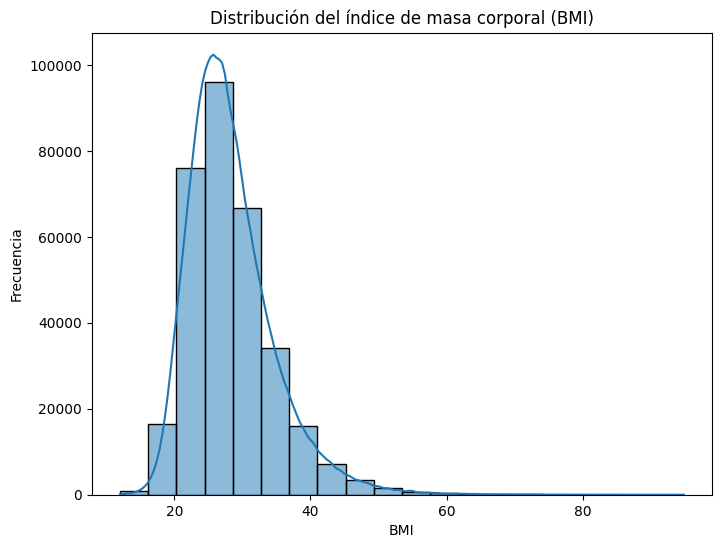

In [12]:
# Visualización de datos
# histograma del índice de masa corporal (BMI)
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribución del índice de masa corporal (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

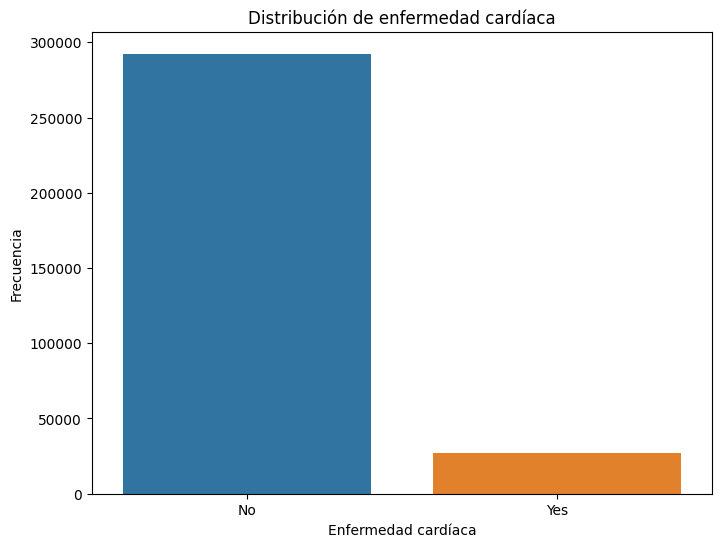

In [13]:
# gráfico de barras de enfermedad cardíaca (HeartDisease)
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribución de enfermedad cardíaca')
plt.xlabel('Enfermedad cardíaca')
plt.ylabel('Frecuencia')
plt.show()

In [14]:

# Ejemplo: matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


ValueError: could not convert string to float: 'No'

<Figure size 1000x800 with 0 Axes>